In [12]:
import pandas as pd
df=pd.read_excel('Figure4data.xlsx')

In [13]:
df

,Unnamed: 0,jiangsu confirmed,jiangsu cured,China non-Hubei confirmed,China non-Hubei cured
0,2020-01-20,0,0,21,0.0
1,2020-01-21,0,0,65,0.0
2,2020-01-22,5,0,127,0.0
3,2020-01-23,9,0,281,3.0
4,2020-01-24,18,0,558,6.0
...,...,...,...,...,...
56,2020-03-16,631,631,13082,NaN
57,2020-03-17,631,631,13094,NaN
58,2020-03-18,631,631,13128,NaN
59,2020-03-19,631,631,13167,NaN


In [14]:
jscon=df.iloc[:,1].values #jiangsu confirmed
jscur=df.iloc[:,2].values #jiangsu cured
chinacon=df.iloc[:-9,3].values # China non-Hubei confrimed
chinacur=df.iloc[:-9,4].values # China non-Hubei cured

In [15]:
from scipy.optimize import curve_fit
ydata = jscon
xdata = list(range(1,len(ydata)+1))

def sigmoid(x, L ,x0, k):
    y = L / (1 + np.exp(-k*(x-x0)))
    return (y)
p0 = [max(ydata), np.median(xdata),1] # this is an mandatory initial guess
popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox')

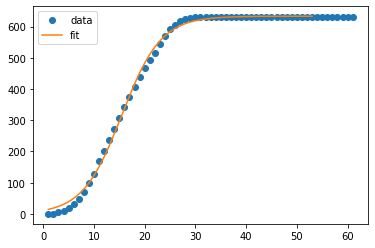

In [16]:
import numpy as np
x = np.linspace(1,53,num=1000)
y=[sigmoid(xi,popt[0],popt[1],popt[2]) for xi in x];

from matplotlib import pyplot as plt
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(x,y, label='fit')
# plt.ylim(0, 1.3)
plt.legend(loc='best')

In [17]:
popt

array([6.33346195e+02, 1.54893645e+01, 2.59140904e-01])

In [18]:
pcov

array([[ 3.53844846e+00,  6.44614452e-02, -3.41699683e-03],
       [ 6.44614452e-02,  7.68188164e-03, -6.04422458e-05],
       [-3.41699683e-03, -6.04422458e-05,  2.64436263e-05]])

In [19]:
def getIndexes(y_predict, y_data):
    n = y_data.size
    # SSE
    SSE=((y_data-y_predict)**2).sum()
    # MSE
    MSE=SSE/n
    # RMSE
    RMSE=np.sqrt(MSE)
    
    # R square
    u = y_data.mean()
    SST=((y_data-u)**2).sum()
    SSR=SST-SSE
    R_square=SSR/SST
    return SSE, MSE, RMSE, R_square

In [20]:
y_predict=[sigmoid(xi,popt[0],popt[1],popt[2]) for xi in xdata];
SSE, MSE, RMSE, R_square = getIndexes(y_predict,ydata)

In [21]:
print('SSE: ',SSE)
print('MSE: ',MSE)
print('RMSE: ',RMSE)
print('R_square: ',R_square)

SSE:  6531.112559525834
MSE:  107.06741900862022
RMSE:  10.347338740401815
R_square:  0.9979098521204529
